[官方中文文档](https://www.osgeo.cn/pillow/)

# 概念

## Mode（模式）

The mode of an image defines the type and depth of a pixel in the image. The current release supports the following standard modes:

- 1 (1-bit pixels, black and white, stored with one pixel per byte)
- L (8-bit pixels, black and white)
- P (8-bit pixels, mapped to any other mode using a color palette)
- RGB (3x8-bit pixels, true color)
- RGBA (4x8-bit pixels, true color with transparency mask)
- CMYK (4x8-bit pixels, color separation)
- YCbCr (3x8-bit pixels, color video format)
- I (32-bit signed integer pixels)
- F (32-bit floating point pixels)

PIL also provides limited support for a few special modes, including LA (L with alpha), RGBX (true color with padding) and RGBa (true color with premultiplied alpha). However, PIL doesn’t support user-defined modes; if you to handle band combinations that are not listed above, use a sequence of Image objects.

You can read the mode of an image through the mode attribute. This is a string containing one of the above values.

## Size（大小）

You can read the image size through the size attribute. This is a 2-tuple, containing the horizontal and vertical size in pixels.

## Coordinate System（坐标系）

The Python Imaging Library uses a Cartesian pixel coordinate system, with (0,0) in the upper left corner. Note that the coordinates refer to the implied pixel corners; the centre of a pixel addressed as (0, 0) actually lies at (0.5, 0.5).

Coordinates are usually passed to the library as 2-tuples (x, y). Rectangles are represented as 4-tuples, with the upper left corner given first. For example, a rectangle covering all of an 800x600 pixel image is written as (0, 0, 800, 600).

## Palette（调色板）

The palette mode (P) uses a color palette to define the actual color for each pixel.

## Filters（滤镜）

For geometry operations that may map multiple input pixels to a single output pixel, the Python Imaging Library provides four different resampling filters.

NEAREST
    Pick the nearest pixel from the input image. Ignore all other input pixels.
    
BILINEAR
    Use linear interpolation over a 2x2 environment in the input image. Note that in the current version of PIL, this filter uses a fixed input environment when downsampling.

BICUBIC
    Use cubic interpolation over a 4x4 environment in the input image. Note that in the current version of PIL, this filter uses a fixed input environment when downsampling.

ANTIALIAS
    Calculate the output pixel value using a high-quality resampling filter (a truncated sinc) on all pixels that may contribute to the output value. In the current version of PIL, this filter can only be used with the resize and thumbnail methods.

# 使用 Image 类

In [21]:
from PIL import Image
im = Image.open('./image.jfif')
im2 = Image.open('./image2.jfif')
im3 = Image.open('./image3.jpg')

In [30]:
im3.getcolors(maxcolors=256)

[(208718, 0),
 (23280, 1),
 (13741, 2),
 (10989, 3),
 (8631, 4),
 (7117, 5),
 (6587, 6),
 (7522, 7),
 (6794, 8),
 (6742, 9),
 (7136, 10),
 (7018, 11),
 (6546, 12),
 (5371, 13),
 (4006, 14),
 (3042, 15),
 (2561, 16),
 (2273, 17),
 (2260, 18),
 (2107, 19),
 (1869, 20),
 (1796, 21),
 (1704, 22),
 (1651, 23),
 (1608, 24),
 (1535, 25),
 (1540, 26),
 (1594, 27),
 (1495, 28),
 (1570, 29),
 (1525, 30),
 (1537, 31),
 (1423, 32),
 (1454, 33),
 (1475, 34),
 (1490, 35),
 (1459, 36),
 (1532, 37),
 (1479, 38),
 (1421, 39),
 (1433, 40),
 (1574, 41),
 (1467, 42),
 (1514, 43),
 (1544, 44),
 (1564, 45),
 (1503, 46),
 (1580, 47),
 (1559, 48),
 (1409, 49),
 (1510, 50),
 (1439, 51),
 (1482, 52),
 (1418, 53),
 (1490, 54),
 (1476, 55),
 (1478, 56),
 (1502, 57),
 (1510, 58),
 (1525, 59),
 (1575, 60),
 (1583, 61),
 (1727, 62),
 (1778, 63),
 (1826, 64),
 (1944, 65),
 (1893, 66),
 (2046, 67),
 (2047, 68),
 (2138, 69),
 (2132, 70),
 (2129, 71),
 (2286, 72),
 (2302, 73),
 (2238, 74),
 (1978, 75),
 (1885, 76),
 (18

In [2]:
# format 这个属性标识了图像来源的格式。如果图像不是从文件读取的，那么这个属性值将是 None。
# size 是一个 (width, height) 元组，表示了图像的宽度和高度（单位为像素）。
# mode 代表了图像的模式。常见的模式有：L（灰度图像），RGB（真彩色图像），CMYK，RGBA 等等。
from __future__ import print_function
print(im.format, im.size, im.mode)
print(im2.format, im2.size, im2.mode)
print(im3.format, im3.size, im3.mode)

JPEG (1000, 1506) RGB
JPEG (625, 913) RGB
JPEG (1280, 1834) L


In [12]:
im.show()

# 读写图像

- 转换文件格式到JPEG

In [4]:
from __future__ import print_function
import os, sys
from PIL import Image

# argv = sys.argv
argv = ['pillow_test.py', './image.jfif', './image2.jfif']

for infile in argv[1:]:
    f, e = os.path.splitext(infile)
    outfile = f + ".jpg"
    if infile != outfile:
        try:
            Image.open(infile).save(outfile)
        except IOError:
            print("cannot convert", infile)

- 创建 JPEG 缩略图

In [5]:
from __future__ import print_function
import os, sys
from PIL import Image

# argv = sys.argv
argv = ['pillow_test.py', './image.jpg']

size = (128, 128)

for infile in argv[1:]:
    outfile = os.path.splitext(infile)[0] + ".thumbnail"
    if infile != outfile:
        try:
            im = Image.open(infile)
            im.thumbnail(size)
            im.save(outfile, "JPEG") # 如果你使用的不是常规的文件后缀名，可以通过第二个参数指定文件格式
        except IOError:
            print("cannot create thumbnail for", infile)

很重要的一点是这个库不会直接解码或者加载图像栅格数据。当你打开一个文件，只会读取文件头信息用来确定格式，颜色模式，大小等等，文件的剩余部分不会主动处理。这意味着打开一个图像文件的操作十分快速，跟图片大小和压缩方式无关。下面是一个简单的脚本用来快速验证大量图片。

- 验证图像文件

In [8]:
from __future__ import print_function
import sys
from PIL import Image

argv = ['pillow_test.py', './image.jpg', './image2.jfif']

for infile in argv[1:]:
    try:
        with Image.open(infile) as im:
            print(infile, im.format, "%dx%d" % im.size, im.mode)
    except IOError:
        pass

./image.jpg JPEG 1000x1506 RGB
./image2.jfif JPEG 625x913 RGB


# 剪切，粘贴，合并图像

- 从图像中复制出一个矩形选区

In [16]:
box = (100, 100, 400, 400)
region = im.crop(box)

- 处理复制的矩形选区并粘贴到原图

In [17]:
region = region.transpose(Image.ROTATE_180)
im.paste(region, box)
# im.show()

当你粘贴矩形选区的时候必须保证尺寸一致。此外，矩形选区不能在图像外。然而你不必保证矩形选区和原图的颜色模式一致，因为矩形选区会被自动转换颜色（参看下面的 颜色变换 部分），下面是一个例子：

- Rolling an image

In [18]:
def roll(image, delta):
    "Roll an image sideways"

    xsize, ysize = image.size

    delta = delta % xsize
    if delta == 0: return image

    part1 = image.crop((0, 0, delta, ysize))
    part2 = image.crop((delta, 0, xsize, ysize))
    image.paste(part2, (0, 0, xsize-delta, ysize))
    image.paste(part1, (xsize-delta, 0, xsize, ysize))

    return image

In [28]:
if __name__ == "__main__":
    im = Image.open("./image.jpg")
    im = roll(im, im.width // 3)
    im.show()

- 分离和合并颜色通道

In [47]:
im = Image.open("./image.thumbnail")

r, g, b = im.split()
im = Image.merge("RGB", (b, g, r))

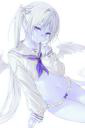

In [48]:
im

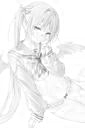

In [49]:
r

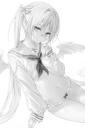

In [50]:
g

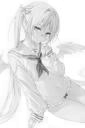

In [51]:
b

# 几何变换

- 简单的几何变换

In [54]:
im = Image.open("./image.jpg")

out = im.resize((128, 128))
out = out.rotate(45) # degrees counter-clockwise

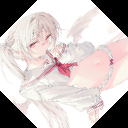

In [55]:
out

- 旋转图像

In [56]:
out = im.transpose(Image.FLIP_LEFT_RIGHT)
out = im.transpose(Image.FLIP_TOP_BOTTOM)
out = im.transpose(Image.ROTATE_90)
out = im.transpose(Image.ROTATE_180)
out = im.transpose(Image.ROTATE_270)

# 颜色变换

- 颜色模式转换

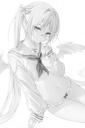

In [4]:
im = Image.open("./image.thumbnail").convert("L")
im

# 颜色增强

- 过滤器

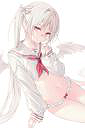

In [61]:
# The ImageFilter module contains a number of pre-defined enhancement filters that 
# can be used with the filter() method.
from PIL import Image, ImageFilter
im = Image.open("./image.thumbnail")
out = im.filter(ImageFilter.DETAIL)
out 

- 点操作

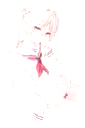

In [66]:
# The point() method can be used to translate the pixel values of an image (e.g. 
# image contrast manipulation). In most cases, a function object expecting one 
# argument can be passed to the this method. Each pixel is processed according to 
# that function:

# multiply each pixel by 1.2
im = Image.open("./image.thumbnail")
out = im.point(lambda i: i * 1.2)
out

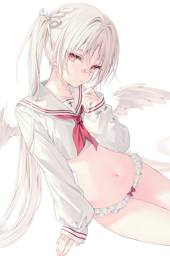

In [72]:
# Using the above technique, you can quickly apply any simple expression to an 
# image. You can also combine the point() and paste() methods to selectively 
# modify an image:

im = Image.open("./image.jpg")
im.thumbnail((256, 256))

# split the image into individual bands
source = im.split()

R, G, B = 0, 1, 2

# Note the syntax used to create the mask:

    # imout = im.point(lambda i: expression and 255)

# Python only evaluates the portion of a logical expression as is necessary to 
# determine the outcome, and returns the last value examined as the result of the e
# xpression. So if the expression above is false (0), Python does not look at the 
# second operand, and thus returns 0. Otherwise, it returns 255.

# select regions where red is less than 100
mask = source[R].point(lambda i: i < 100 and 255)

# process the green band
out = source[G].point(lambda i: i * 0.7)

# paste the processed band back, but only where red was < 100
source[G].paste(out, None, mask)

# build a new multiband image
im = Image.merge(im.mode, source)

im

- 增强

In [82]:
from PIL import ImageEnhance

im = Image.open("./image.jpg")
im.thumbnail((256, 256))

enh = ImageEnhance.Contrast(im)
enh.enhance(1.3).show("30% more contrast")

# 多帧图像序列 

The Python Imaging Library contains some basic support for image sequences (also called animation formats). Supported sequence formats include FLI/FLC, GIF, and a few experimental formats. TIFF files can also contain more than one frame.

When you open a sequence file, PIL automatically loads the first frame in the sequence. You can use the seek and tell methods to move between different frames:

- 读取序列

duration: 70


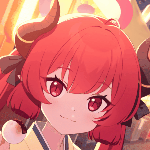

In [2]:
from PIL import Image

im = Image.open("./image_gif.gif")

# get the duration of the gif
duration = im.info['duration']
print(f"duration: {duration}")

im.seek(1) # skip to the second frame

try:
    while 1:
        im.seek(im.tell()+1)
        # do something to im
except EOFError:
    pass # end of sequence

im

As seen in this example, you’ll get an EOFError exception when the sequence ends.

Note that most drivers in the current version of the library only allow you to seek to the next frame (as in the above example). To rewind the file, you may have to reopen it.

The following iterator class lets you to use the for-statement to loop over the sequence:

- 序列迭代 class

In [ ]:
class ImageSequence:
    def __init__(self, im):
        self.im = im
    def __getitem__(self, ix):
        try:
            if ix:
                self.im.seek(ix)
            return self.im
        except EOFError:
            raise IndexError # end of sequence

for frame in ImageSequence(im):
    # do something to frame
    pass

# Postscript 打印

The Python Imaging Library includes functions to print images, text and graphics on Postscript printers. Here’s a simple example:

[drawing_postscript.py](./drawing_postscript.py)

# 更多关于读取图像

You can use a file-like object instead of the filename. The object must implement read(), seek() and tell() methods, and be opened in binary mode

- 从文件读取

In [3]:
with open("./image.jpg", "rb") as fp:
    im = Image.open(fp)
    im.load()

- 从压缩包中读取

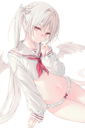

In [15]:
from PIL import TarIO

fp = TarIO.TarIO("image.tar", "image.jpg")
im = Image.open(fp)

# 等比例缩放到高128
im.thumbnail((128, 128))
im

# 控制解码器 

Some decoders allow you to manipulate the image while reading it from a file. This can often be used to speed up decoding when creating thumbnails (when speed is usually more important than quality) and printing to a monochrome laser printer (when only a greyscale version of the image is needed).

The draft() method manipulates an opened but not yet loaded image so it as closely as possible matches the given mode and size. This is done by reconfiguring the image decoder.

JPEG (1000, 1506) RGB
JPEG (125, 189) L


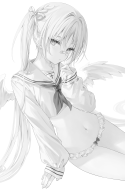

In [18]:
# Reading in draft mode
from __future__ import print_function
im = Image.open("./image.jpg")
print(im.format, im.size, im.mode)

im.draft("L", (100, 100))
print(im.format, im.size, im.mode)
im

# ImageColor

In [6]:
from PIL import ImageColor

# 1. PIL.ImageColor.getrgb(color)
# 2. PIL.ImageColor.getcolor(color, mode)

ImageColor.getcolor("orange", "RGBA")

(255, 165, 0, 255)

# ImageFont

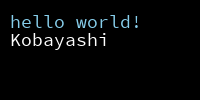

In [11]:
from PIL import ImageFont, ImageDraw, Image

im = Image.new("RGB", (200, 100), "black")

draw = ImageDraw.Draw(im)

font = ImageFont.truetype("./SourceCodePro-Regular.ttf", 18)

draw.text((10, 10), "hello world!", font=font, fill="skyblue")
draw.text((10, 10+font.getbbox("hello world!")[3]), "Kobayashi", font=font, fill="white")

im

In [15]:
from PIL import ImageFont

font = ImageFont.truetype("./SourceCodePro-Regular.ttf", 18)

# 测量 实心正方体 的高度和宽度
# font.getbbox("██")
font_width, font_height = font.getbbox("██")[2:]
font_width, font_height

(22, 22)

In [7]:
font.getbbox("▇")

(0, 6, 11, 22)

# ImageGrab

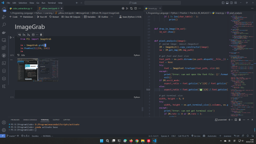

In [18]:
from PIL import ImageGrab

im = ImageGrab.grab()
im.thumbnail((256, 256))
im

# ImageShow

In [20]:
from PIL import Image, ImageShow

im = Image.open("./image.jpg")
ImageShow.show(im, title="image")

True